<h1><mark style = "background: #a1f5a5">Step 1</mark>: Import the data</h1>

For now, the data is just a .txt file in the GitHub repo.

In [10]:
import pandas as pd

# GET DATA FROM GITHUB REPO
x = pd.read_csv('https://raw.githubusercontent.com/Refath/ExtractGraph/main/ExpDecay.txt')

print(x)

    Time (sec)  Heart Rate (BPM)
0         -6.0              1.12
1         -5.0              0.94
2         -4.0             -1.90
3         -3.0              1.44
4         -2.0             -0.21
5         -1.0             -0.83
6          0.0              1.10
7          1.0             -0.62
8          2.0             -0.12
9          3.0              0.60
10         4.0             -0.58
11         5.0              0.22
12         6.0              0.19


<h1><mark style = "background: #a1f5a5">Step 2</mark>: Define function and parameters</h1>

The three parameters in this case of an exponential decaying graph are $A$, $w$, and $T_2$

In [3]:
import numpy as np

# FUNCTION WHOSE PARAMETERS PROGRAM SHOULD BE GUESSING
def bpm(t, A, w, T2):
    return A*np.cos(w*t)*(2.718**(-t/T2))

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<h1><mark style = "background: #a1f5a5">Step 3</mark>: Manual guess</h1>

The user's guess for each parameter is the array g = []. The for loop contains the inputs and $y$ is just an array of the outputs.

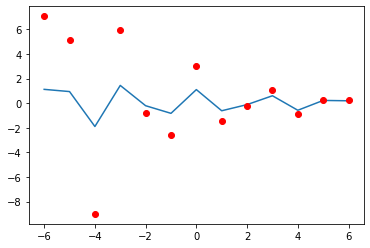

In [4]:
import matplotlib.pyplot as plt

# MANUAL GUESS
g = [3,4,3.5]

# CREATE ARRAY FOR OUTPUTS
n = len(x['Time (sec)'])
y = np.empty(n)

# TRY EVERY INPUT IN THE DOMAIN
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i], g[0],g[1],g[2])

# PLOT IT ALL OUT
plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'ro')

<h1><mark style = "background: #a1f5a5">Step 4</mark>: Best fit</h1>

Use the <mark>scipy.optimize curve_fit</mark> function to find the parameters which best fit the curve. 

[1.0989457  3.99948123 6.79126806]


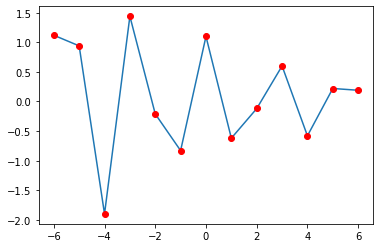

In [8]:
from scipy.optimize import curve_fit

#INPUT & OUTPUTS
t = x['Time (sec)'].values
hr = x['Heart Rate (BPM)'].values

# *MAGIC*
c, cov = curve_fit(bpm,t,hr,g)

print(c)

# TRIES OUT THE MAGIC PARAMETERS ACROSS ENTIRE DOMAIN
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i], c[0],c[1],c[2])

# PLOTS *MAGIC*
plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'ro')

<h1><mark style = "background: #a1f5a5">Step 5</mark>: Check Coefficient of Determination $R^2$</h1>

Check $R^2$ to see how well SciPy's guess matches with the true graph. The closer to 1, the better. 

In [9]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(y,hr))

R^2:  0.9999919687127633
